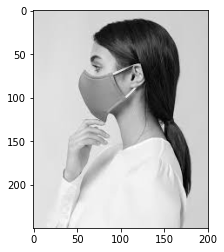

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/Users/stephenim/MaskImages"
CATEGORIES = ["with_mask", "without_mask"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR, category) # path to mask or no mask dir 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # remove colour (not necessary for differentiating mask to no mask)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [6]:
print(img_array)

[[215 215 215 ... 203 203 203]
 [215 215 215 ... 203 203 203]
 [215 215 215 ... 203 203 203]
 ...
 [227 227 227 ... 208 208 208]
 [227 227 227 ... 206 206 206]
 [227 227 227 ... 206 206 206]]


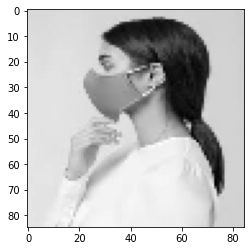

In [7]:
IMG_SIZE = 85

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [1]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 
        path = os.path.join(DATADIR, category) # path to mask or no mask dir 
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) # remove colour (not necessary for differentiating mask to no mask
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()
    

NameError: name 'CATEGORIES' is not defined

In [9]:
print(len(training_data))

7553


In [10]:
import random

random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1]) 

0
1
0
0
0
1
1
0
1
1


In [12]:
X = []
y = []

In [13]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #1 at the end because GRAYSCALE

In [14]:
import pickle 

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))
y = np.array(y)

X = X/255.0

model = Sequential()
model.add(   Conv2D(64, (3,3), input_shape = X.shape[1:])   )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
  3/213 [..............................] - ETA: 1:51 - loss: 0.9157 - accuracy: 0.5365

KeyboardInterrupt: 